In [1]:
import torch
import sounddevice as sd
import numpy as np
from denoiser.dsp import convert_audio
import matplotlib.pyplot as plt
import soundfile as sf
from denoiser import pretrained
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import wave
import torch
from IPython import display as disp

In [7]:
model = pretrained.master64().cpu()

Downloading: "https://dl.fbaipublicfiles.com/adiyoss/denoiser/master64-8a5dfb4bb92753dd.th" to C:\Users\ADE17/.cache\torch\hub\checkpoints\master64-8a5dfb4bb92753dd.th


  0%|          | 0.00/128M [00:00<?, ?B/s]

In [3]:
duration = 10  
sr = 16000

def record_audio(duration, sample_rate):
    print("Recording started...")
    audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
    sd.wait()  
    print("Recording finished.")
    return audio_data

audio_array = record_audio(duration, sr)

Recording started...
Recording finished.


In [13]:
audio_array, fs = sf.read(r"C:\Users\ADE17\Desktop\Kickelhack\notebook\data\main_dataset\noisy\19-227-0004.wav")

In [14]:
from IPython import display as disp
model = pretrained.dns64().cpu()
wav = torch.from_numpy(audio_array.astype(np.float32)).reshape(1,-1)
# wav = convert_audio(wav.cpu(), sr, model.sample_rate, model.chin)
with torch.no_grad():
    denoised = model(wav[None])[0]
disp.display(disp.Audio(wav.data.cpu().numpy(), rate=model.sample_rate))
disp.display(disp.Audio(denoised.data.cpu().numpy(), rate=model.sample_rate))

In [12]:
from denoiser_utils import reduce_noise

In [13]:
op = reduce_noise(model, audio_array)

In [14]:
from IPython import display as disp
disp.display(disp.Audio(op.data, rate=model.sample_rate))

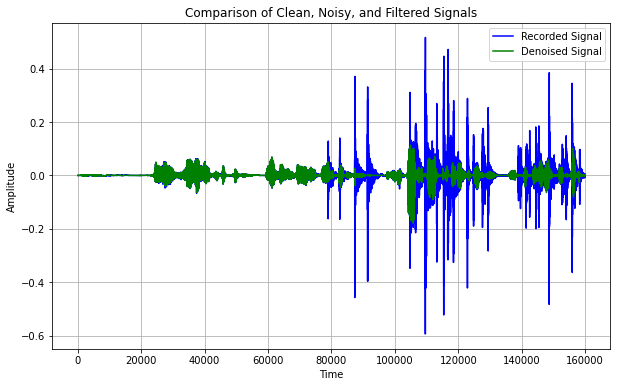

In [48]:
time = np.arange(len(audio_array))

plt.figure(figsize=(10, 6))
plt.plot(time, audio_array, label='Recorded Signal', color='blue')
plt.plot(time, np.array(denoised).reshape(-1), label='Denoised Signal', color='green')


plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Comparison of Clean, Noisy, and Filtered Signals')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [41]:
import whisper

In [49]:
model = whisper.load_model("small")

audio = whisper.pad_or_trim(np.array(denoised).reshape(-1))

100%|███████████████████████████████████████| 461M/461M [00:30<00:00, 15.8MiB/s]


In [50]:
result = model.transcribe(audio)
print(result["text"])

# _, probs = model.detect_language(audio)
# print(f"Detected language: {max(probs, key=probs.get)}")

KeyboardInterrupt: 

In [45]:
mel = whisper.log_mel_spectrogram(audio)

_, probs = model.detect_language(mel)
print(f"Detected language: {max(probs, key=probs.get)}")

Detected language: en
